In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


# Welcome to a full guide on Linear Regression 📏🔥 


#### I'm sure that many of you have heard and used/implemented linear regression for some of your problems. 
#### But many of you might not have a full image of the method and simply run the code because it works very easily. 
#### I was doing that ever since I was interested in Machine Learning but after learning truly what was behind this method, I was more appreciative of the method and I wish more people would understand the model too. 

## So today, I'm going to walk you through the foundations of Linear Regression

<div style="width:100%;text-align: center;"> <img align=middle src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" style="width:50%;height:50%;margin:auto;"> </div>

# 1. Introduction

## So, what is Linear Regression?

#### Well, according to scikit-learn's webpage, it says 
####  ["LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation."](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## But let us break that down!

# 2. Basic Concept

#### Let us say we have a set of data as shown below:

$$ \LARGE (x_i, y_i)_{i=1}^N $$ 

#### where i ranges from 1 to N - the number of data points in our dataset.

#### Although in the definition above, it mentions 'p' number of coefficients, we are just going to work with one coefficient for now, to simplify the whole process. But keep in mind that this entire process works the same for multiple coefficients. 

#### In the case of one coefficient, our **equation for linear regression** would look like this:

$$\LARGE f_{w,b}(x) =  wx + b$$

#### As defined above, the aim for this equation is to "*minimize the residual sum of squares between the observed targets in the dataset, and the targets*"

#### In simpler terms, it means to draw a straight line (in 2D) that is closest to all the datapoints that has been plotted.
#### Allow me to demonstrate.

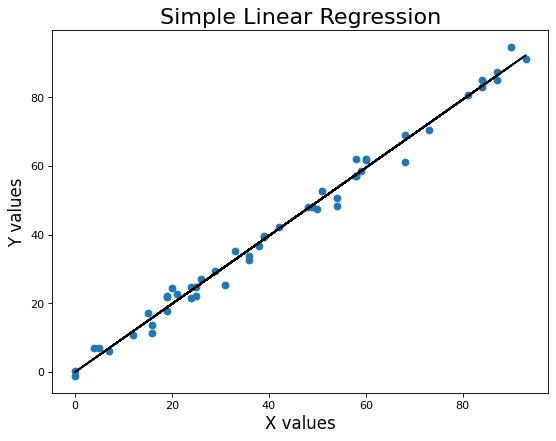

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import linear_model

train_df = pd.read_csv('../input/random-linear-regression/train.csv')
train_df = train_df[:50]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X = train_df['x'].values[:,np.newaxis]
y = train_df['y'].values
regr.fit(X,y)

# Plotting the graph
figure(figsize=(8, 6), dpi=80)
plt.scatter(X, y)
plt.plot(X, regr.predict(X),color='k')
plt.title("Simple Linear Regression", fontsize=20)
plt.ylabel('Y values', fontsize=15)
plt.xlabel('X values', fontsize=15)
plt.show()

#### As you can see, the line is pretty close to all the datapoints that have been plotted. 

#### This is surely not hard to see for us. However, if I tweaked the line just a slight bit as shown below, how would you know which one is the best fitted Linear Regression line?

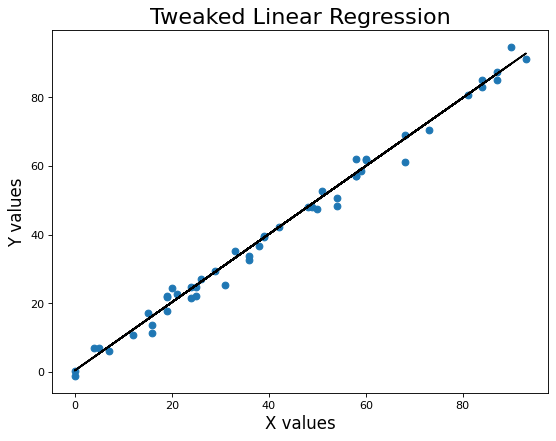

In [3]:
#Altering the value of the predicted 
y_new = regr.predict(X)
y_new += 0.5

# Plotting the graph
figure(figsize=(8, 6), dpi=80)
plt.scatter(X, y)
plt.plot(X, y_new,color='k')
plt.title("Tweaked Linear Regression", fontsize=20)
plt.ylabel('Y values', fontsize=15)
plt.xlabel('X values', fontsize=15)
plt.show()

#### Can you spot the difference?

# 3. Optimization

#### In Machine Learning, we 'teach' the computers to obtain the optimal results by ensuring it minimizes a specific [Cost Function](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220).

#### It is comparable to a student trying one's hardest to get the least number of questions wrong, contrary to what most of us are trying to do which is trying to get the most number of questions correct.

#### There are various Cost Functions out there in the ML field, but for linear regression, the most commonly used one is called [Mean Squared Error (MSE)](https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f).

$$\LARGE \frac{1}{N} \Sigma_{i=1}^N({f_{w,b}(x_i)}-{y_i})^2$$

#### To understand this cost function, we first have to understand the loss function, a component that makes up this cost function. 
#### *The difference between a cost and loss function is that a loss function is for a single datapoint while a cost function is meant for the whole model*.

#### The loss function used to data points in Linear Regression is the [Squared Error Loss](https://www.sciencedirect.com.remotexs.ntu.edu.sg/topics/computer-science/squared-error-loss) as shown below:

$$\LARGE ({f_{w,b}(x_i)}-{y_i})^2 $$

#### As you can see from the equation, the result for the Squared Error Loss is the difference between the predicted value and the actual value and squaring that term. The Cost Function thus would just be the average values for all the datapoints in the dataset. 
#### Therefore, as our model tries to minimize this Cost Function, our Linear Regression line would appear to 'fit' better to our dataset and be close to all possible points.

## Note

#### Some of you might be asking, "Why is the loss quadratic?" and that is a very valid question to ask. 
#### Apparently the answer is pretty simple. "Because... it's simple. Why keep it difficult?"
#### Apparently, squaring it, according to French mathematician [Adrien-Marie Legendre](https://encyclopediaofmath.org/wiki/Legendre,_Adrien-Marie), is convenient (Do let me know if you think so too in the comments 😂)


#### Furthermore, squaring the erros will **exaggerate** the difference between the predicted and actual values, thus penalizing larger errors more severely for the model.

# 4. The Math Behind The Scenes

#### If you managed to keep up till now, good! 
#### You have understood the basics and foundation of what and how a Linear Regression model works. 
#### However, some of you might be questioning, so how does the model *actually* optimize the Cost Function and manage to output the best fitting Linear Regression line.
#### If you are curious, do read on! 
### Let's dive in!

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1622151834625-66296f9f0e96?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8bWFuJTIwdGhpbmtpbmd8ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60" style="width:50%;height:50%;margin:auto;"> </div>

## 4.1) For the first part, I will explain the easier method which is using **matrix manipulation** and **basic linear algebra** to solve directly.

#### As I have mentioned, our equation looks like this:

$$\LARGE f_{w,b}(x) =  wx + b$$

#### However, for optimization purpose, let us describe this equation in a matrix format, which takes in all the datapoints

$$\LARGE \vec y = B_1 \vec X + B_0 $$

#### where

$$\large \vec y =  f_{w,b}(x) = 
\begin{bmatrix}
y_1 \\
\vdots \\
y_n 
\end{bmatrix}$$,


$$\large \vec X = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix} $$

$$\large B_1 = w $$ 
$$\large B_0 = b $$

#### Now, let us tweak the above equation a bit more into this.

$$\LARGE \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} \vec B_0 \\ \vec B_1 \end{bmatrix}$$


#### Here, we have to keep in mind what we are actually trying to solve for in this optimization task. 
#### We are trying to find the values of **w** and **b** that will give us the best fitting line.

#### Simplifying the above code will result in:

$$\LARGE \vec Y = \vec X \vec B $$

#### where

$$\large \vec B = \begin{bmatrix} \vec B_0 \\ \vec B_1 \end{bmatrix} $$

#### Assuming that the columns of the vector $\large \vec X $ is [linearly independent](https://en.wikipedia.org/wiki/Linear_independence#:~:text=In%20the%20theory%20of%20vector,said%20to%20be%20linearly%20independent.),

$$\LARGE \vec X^T \vec Y = \vec X^T \vec X \vec B $$

$$\LARGE (\vec X^T \vec X)^{-1} \vec X^T \vec Y = \vec B$$

#### Voilà, we have finally found what we were looking for which was $\large \vec B $ which consists of **w** and **b**.

##### For those of you not very familiar with inverses, linear independence, linear algebra, I strongly recommend you check out [this course](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/) from MITOpenCourseWare. 
##### You don't need to know all the details of linear algebra but the first few lectures for the foundations will help you tremendously!

#### Let us apply this knowledge and see if we can apply it to recreate the simple Linear Regression line shown near the start.

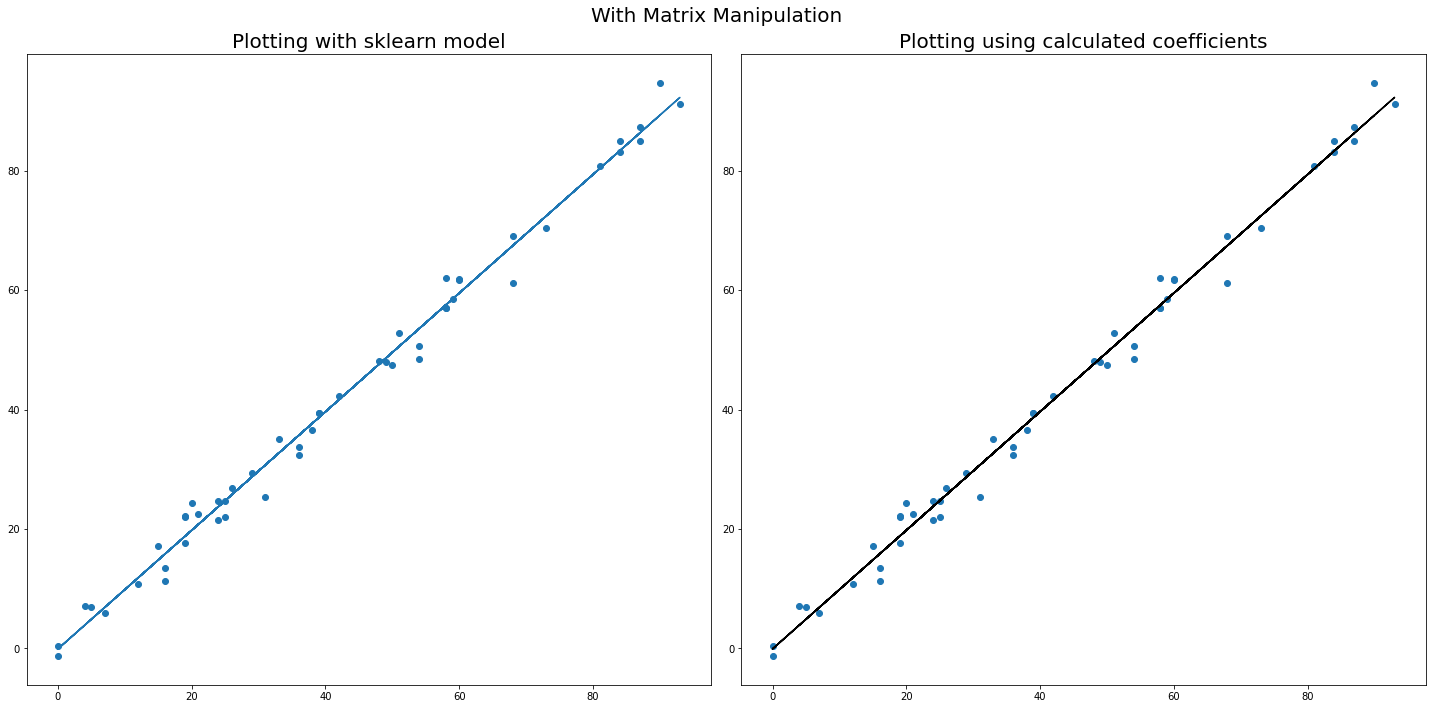

In [4]:
# Making the X vector
temp = pd.DataFrame([1 for i in range(50)])
temp_0 = pd.concat([temp, train_df.x], axis=1)

# Making data into vectors
y = np.array(train_df.y).reshape(50,1)
X = np.array(temp_0)
X_T = np.transpose(X)

# Calculations we just learnt!
b = np.matmul(np.linalg.inv(np.matmul(X_T,X)), (np.matmul(X_T,y)))

train_df = pd.read_csv('../input/random-linear-regression/train.csv')
train_df = train_df[:50]

X = train_df['x'].values[:,np.newaxis]
y = train_df['y'].values
y_pred = b[1]*X+b[0]

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X,y)

# Plotting the graph
plt.rcParams['figure.figsize'] = (20,10)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('With Matrix Manipulation', fontsize=20)

ax1.set_title('Plotting with sklearn model', fontsize=20)
ax1.scatter(X, y)
ax1.plot(X, regr.predict(X))

ax2.set_title('Plotting using calculated coefficients', fontsize=20)
ax2.scatter(X, y)
ax2.plot(X, y_pred,color='k')

fig.tight_layout()

#### GREAT! IT WORKS! 
#### Don't the two lines look very similar?

#### So we have seen one of the ways to obtain the coefficients of the linear regression line which can be used to output the desired best fitting line as shown above.

## 4.2) Now, for the second part, I will be explaining a slightly more complex and more mathematically rigorous method of optimization, also known as Gradient Descent.

#### So what is Gradient Descent? 
#### I'm sure many of you have heard of it in videos, articles or just from other people interested in Machine Learning and especially Deep Learning.

#### In essence, Gradient Descent is by nature an **iterative algorithm that is used to find either the maximum or minimum of a function**. 
#### It may sound very simple but it is a truly necessary tool for Machine Learning where models have to learn by trying to minimize the Cost Function as I have mentioned earlier.

#### The crucial mathematical knowledge behind this iterative algorithm is [partial derivatives](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives).
#### You can read more about partial derivatives in the link above, but to give you a brief explanation, it is basically differentiating the overall multivariable  function by only varying one variable and keeping the other variables constant/unchanged.
#### By doing so, we can see how the function changes with a change in a certain variable that's in focus.

#### So for our case, we are interested in the partial derivative of the Cost Function with respect to the variables **w** and **b**. 
#### We wish to find the values of **w** and **b** which **minimises** the value of the Cost Function.

#### Allow me to show you mathematically what I mean.

#### We let the Cost Function be C

$$\LARGE C = \frac{1}{N} \Sigma_{i=1}^N({f_{w,b}(x_i)}-{y_i})^2 $$ 

#### Since we have to optimize for **w** and **b**, we are interested in the partial derivatives of C with respect to **w** and **b**

$$\LARGE C_w = \frac{2}{N} \Sigma_{i=1}^N x_i({f_{w,b}(x_i)}-{y_i}) $$ 

$$\LARGE C_b = \frac{2}{N} \Sigma_{i=1}^N ({f_{w,b}(x_i)}-{y_i}) $$ 

#### After obtaining the partial derivatives, we want to move our function a certain amount in the opposite direction of the partial derivatives to reach the minimum value for our function

$$\LARGE W = W - lr \times C_w $$

$$\LARGE b = b - lr \times C_b $$

#### The $\large lr $ in the above equation represents the [learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/), which is a hyperparameter that is chosen by the user.
#### It determines the extent by which the model moves in the opposite direction of the partial derivatives.

#### This process of obtaining the values of partial derivatives and the new values of **w** and **b** is **repeated** until the values of **w** and **b** outputs a loss function value near 0.
#### Ideally, it would be great if our loss function reached 0.
#### However, in reality that doesn't really happen, so this iterative algorithm is stopped when the decrease in the value of loss function is not as significant as it was.

##### For those of you who want to learn more about this algorithm, I highly recommend this amazing [video](youtube.com/watch?v=IHZwWFHWa-w) 

#### At this point, some of you might be asking "Hey, why do you keep mentioning in the opposite direction of the partial derivatives".
#### If you realized this, kudos to you because this is a very relevant question when it comes to Gradient Descent and one that I had when I first learnt this.
#### Before I move on to show you Gradient Descent Implementation in code, I first wish to explain to you why we want to move in the opposite direction of the partial derivatives.

## 4.3) Why do we move in the opposite direction of the [partial derivatives](https://towardsdatascience.com/wondering-why-do-you-subtract-gradient-in-a-gradient-descent-algorithm-9b5aabdf8150)?

#### As I have mentioned earlier, partial derivatives tells us the change in output when we change only one variable and keep the others constant.

#### But to truly appreciate the 'direction' of partial derivatives, we need to understand what [directional derivatives](https://mathworld.wolfram.com/DirectionalDerivative.html#:~:text=The%20directional%20derivative%20is%20the,(2)) are.
#### **Directional derivatives** are similar to partial derivatives but the catch here is that '*what if we don't move only in one direction (x or y direction) but a combination of both variables, in the direction of $\large \vec u $*'.

$$\LARGE \nabla_u f = \frac{\partial f}{\partial x} \frac{\partial u}{\partial x} + \frac{\partial f}{\partial y} \frac{\partial u}{\partial y} + \frac{\partial f}{\partial z}  \frac{\partial u}{\partial z}$$

#### Ok, this equation looks very daunting but allow me to give you an example.

#### Let's say that we have a function $\large f = 2x^2 + y^2 $ and a direction of $\large u = [2,2] $ and currently at  $\large [2,3] $

#### By how much would our function's output change when we move from our current position, in the direction of $\large \vec u $?

$$\LARGE \nabla_u f = 2 \times 4x + 2 \times 2y = 8x + 4y$$

#### And since we are currently at (2,3), our function's output would change by a factor of

$$\LARGE \nabla_u f = 16 + 12 = 28$$

#### Now, we are capable of moving in any direction we want, but how can we know the direction which increases the output by most, the direction of the steepest ascent?

#### What we want to know can be formalized by the mathematical definition as shown below where $\large \vec w $ is the directional vector that we are looking for

$$\LARGE \max_{||\vec w||} \nabla f(x,y,z) \cdot \vec w $$

#### where 

$$\large \nabla f(x,y,z) = gradient$$

#### Breaking this equation down to English, we are simply trying to find a certain $\large \vec w $ that maximizes the directional derivative i.e. **increases the function value by the most**.

#### Now, you should have heard of dot product as shown below

$$\LARGE a \cdot b = |a| |b| cos(\theta) $$

#### As you can see, the above equation had a dot product and we know that for the dot product to be maximum, the $\large cos(\theta) $ is the determining factor and that **$\large \theta $ has to be 0 degrees**.

#### **This means that the direction that we have to travel ($\large \vec w $) in for steepest ascent (largest increase in function) is parallel or in the same direction as the gradient of the function $\large \nabla f(x,y,z) $**.

#### Coming back to our original question, "Why do we move in the opposite direction of the partial derivatives?", since the direction that points in the steepest asecent is parallel to the 
#### direction of the function's gradient (which is a matrix of the function's partial derivatives), if we wish to travel in the 'steepest descent', we have to travel exactly opposite to the 
#### function's gradient / function's partial derivatives.

#### Therefore, we minus off the various partial derivatives after multiplying them with the chosen learning rates, to reach the minimum point of our Cost Function as quickly as possible.

#### Now that we are fully aware of the Gradient Descent Algorithm and the elaborate mathematics behind it, let me display some code and show you the output.

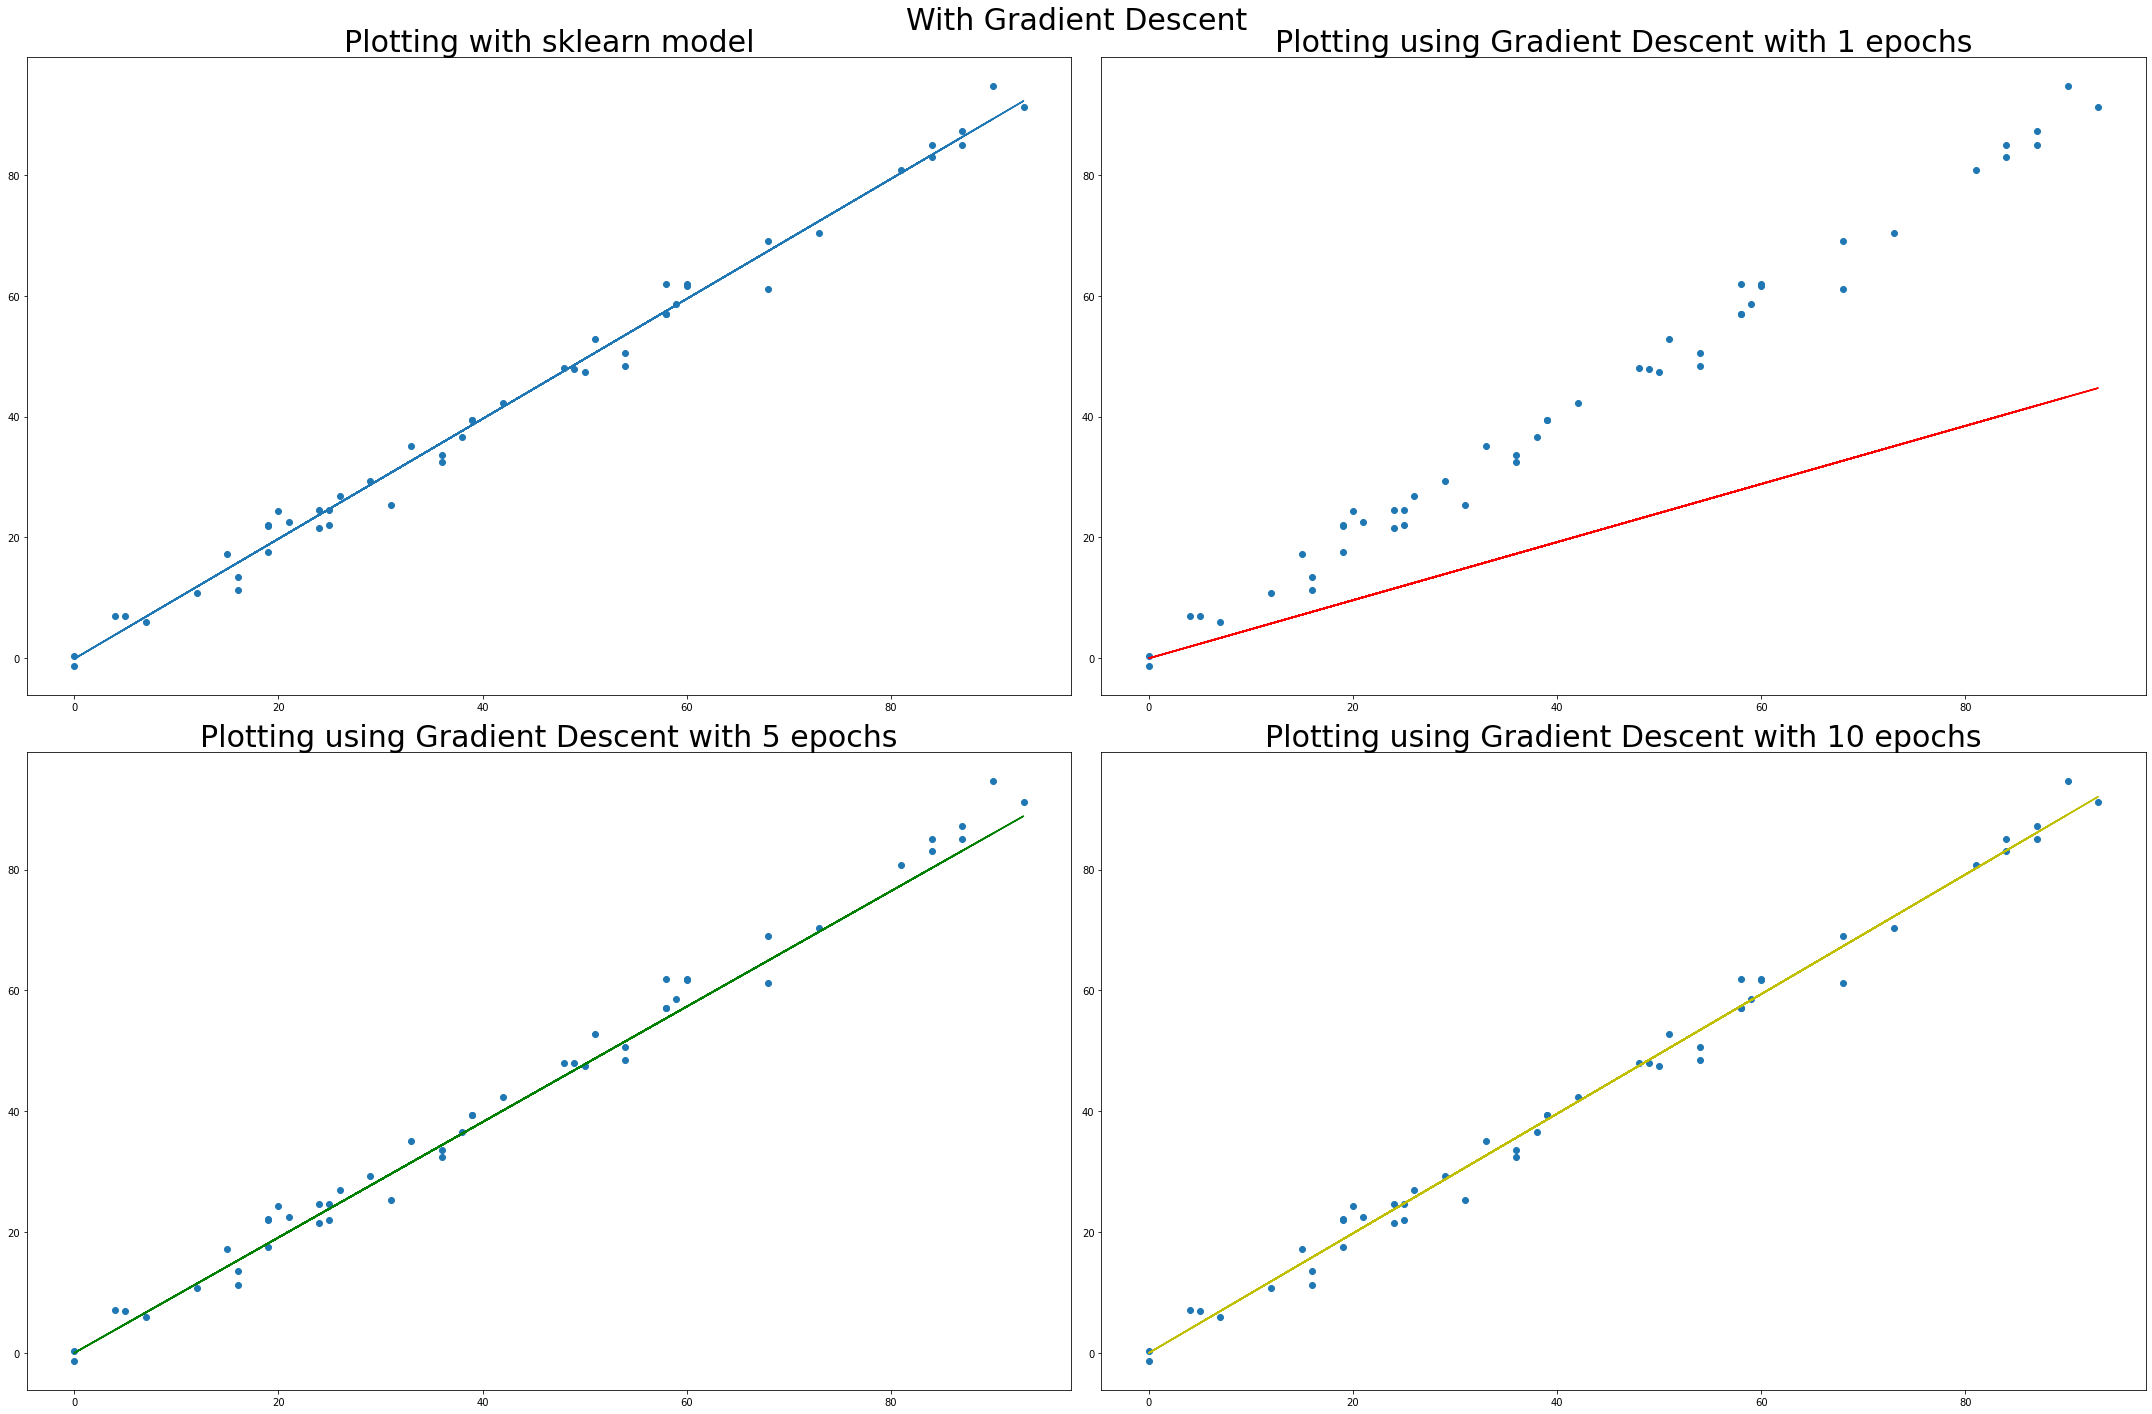

In [5]:
train_df = pd.read_csv('../input/random-linear-regression/train.csv')
train_df = train_df[:50]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X = train_df['x'].values[:,np.newaxis]
y = train_df['y'].values
regr.fit(X,y)

# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
n = float(len(X)) # Number of elements in X
epochs = 10
# The number of iterations to perform gradient descent
# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = m*X + c  # The current predicted value of Y
    y = np.array(y).reshape(50,1)
    D_m = (2/n) * sum(X * (y_pred - y))  # Partial derivative wrt m
    D_c = (2/n) * sum(y_pred - y)  # Partial derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c 
    if i==0:
        y_pred_1 = m*X + c
    elif i==4:
        y_pred_5 = m*X + c
    elif i==9:
        y_pred_10 = m*X + c


# Plotting the graph
plt.rcParams['figure.figsize'] = (30,20)
fig,ax = plt.subplots(2, 2)
fig.suptitle('With Gradient Descent', fontsize=30)

ax[0,0].set_title('Plotting with sklearn model', fontsize=30)
ax[0,0].scatter(X, y)
ax[0,0].plot(X, regr.predict(X))

ax[0,1].set_title('Plotting using Gradient Descent with 1 epochs', fontsize=30)
ax[0,1].scatter(X, y)
ax[0,1].plot(X,y_pred_1, color='r')

ax[1,0].set_title('Plotting using Gradient Descent with 5 epochs', fontsize=30)
ax[1,0].scatter(X, y)
ax[1,0].plot(X,y_pred_5, color='g')

ax[1,1].set_title('Plotting using Gradient Descent with 10 epochs', fontsize=30)
ax[1,1].scatter(X, y)
ax[1,1].plot(X,y_pred_10, color='y')



fig.tight_layout()

#### It is very obvious how effective the Gradient Descent Algorithm really is.
#### It just needs a few epoch to get a rough picture and the more epochs we run the model through, the more accurate the model gets as we can see below.

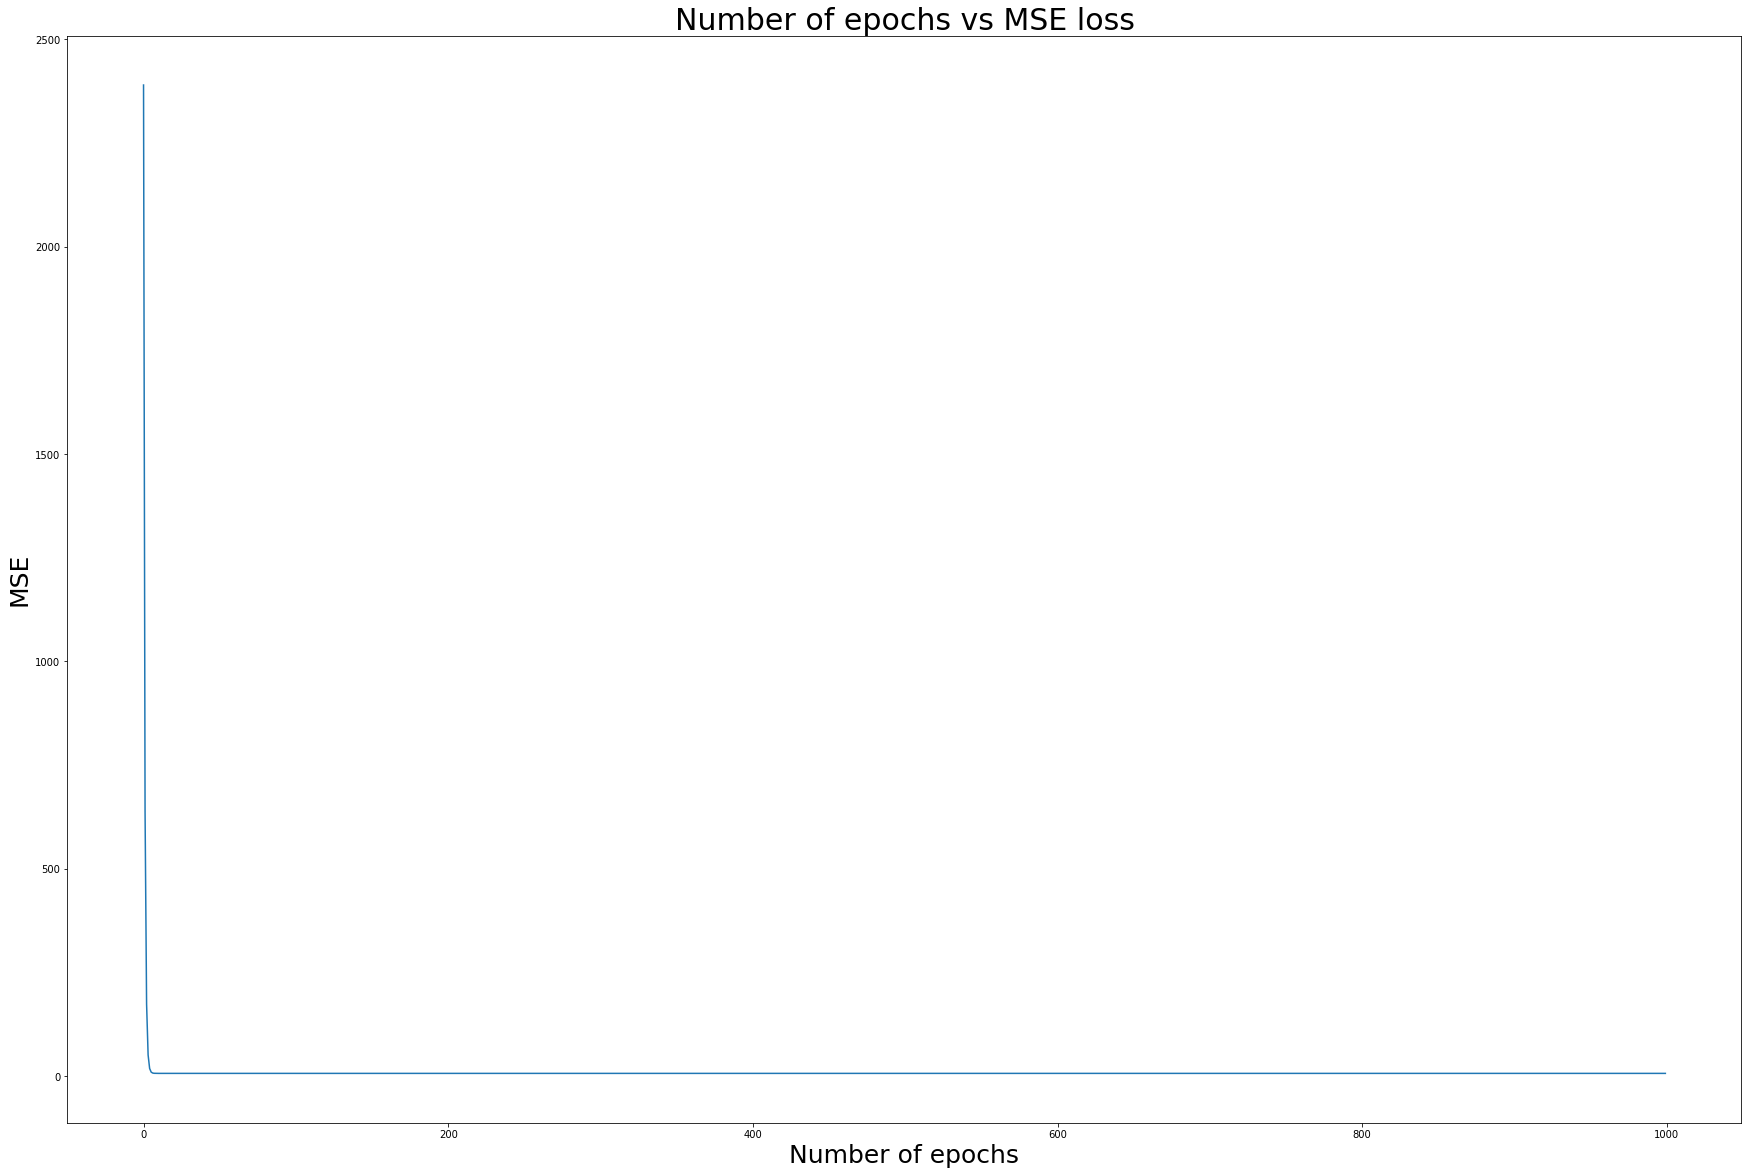

In [6]:
from sklearn.metrics import mean_squared_error

m = 0
c = 0
lr = 0.0001
epochs = 1000
error = []

# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = m*X + c  # The current predicted value of Y
    y = np.array(y).reshape(50,1)
    D_m = (2/n) * sum(X * (y_pred - y))  # Partial derivative wrt m
    D_c = (2/n) * sum(y_pred - y)  # Partial derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c   
    error.append(mean_squared_error(y, y_pred))
    
plt.title('Number of epochs vs MSE loss', fontsize=30)
plt.xlabel('Number of epochs', fontsize=25)
plt.ylabel('MSE', fontsize=25)
plt.plot([i for i in range(1000)], error)
plt.show()

#### Obviously the above Linear Regression problem was an extremely simple one so a few epochs and a simple Gradient Descent Algorithm should optimize very effectively.

# 5. Conclusion

#### If you managed to follow through all the way to the end, you deserve an award ✨

#### Linear Regression is one of the simplest yet one of the most effective and efficient models when it comes to tackling problems that is of a linear nature.
#### Through this notebook, I do hope you learnt some new and interesting facts about Linear Regression and the rigorous mathematical knowledge that is at work behind the scenes when you call .fit() 

#### If you enjoyed this work of mine, please do check out other pieces such as my [competition notebook for spaceshit titanic](https://www.kaggle.com/code/kimmik123/spaceship-titanic-xgboost-random-forest-79-5) or [data visualization and analysis on suicide ](https://www.kaggle.com/code/kimmik123/so-what-do-you-think-is-the-reason-for-suicide).

#### Do leave a comment if you wish and please upvote if you found this notebook useful! It motivates me to keep pushing forward ^_^

#### I will be posting similar guides about other Machine Learning models soon so do keep a lookout for those and until then... Cheers!

# 6. Credit

 
* https://en.wikipedia.org/wiki/Help:Displaying_a_formula#Functions,_symbols,_special_characters
* https://krish9a.medium.com/mathematical-notations-for-machine-learning-markdown-5feb99e8d412
* https://towardsdatascience.com/building-linear-regression-least-squares-with-linear-algebra-2adf071dd5dd
* https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression).
* https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
* https://towardsdatascience.com/wondering-why-do-you-subtract-gradient-in-a-gradient-descent-algorithm-9b5aabdf8150